In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [46]:
# read data
data = pd.read_csv("data/nba_2013.csv")

In [47]:
data.sample(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
48,Bismack Biyombo,C,21,CHA,77,9,1072,88,144,0.611,...,261,366,8,7,86,40,124,222,2013-2014,2013
10,Al-Farouq Aminu,SF,23,NOP,80,65,2045,234,494,0.474,...,367,496,114,82,38,88,147,572,2013-2014,2013
218,Kyrie Irving,PG,21,CLE,71,71,2496,532,1237,0.430,...,207,259,433,108,23,190,163,1478,2013-2014,2013
232,Brandon Jennings,PG,24,DET,80,79,2728,423,1135,0.373,...,185,244,609,101,8,215,157,1241,2013-2014,2013
406,Tiago Splitter,C,29,SAS,59,50,1271,181,346,0.523,...,240,363,90,29,31,75,117,483,2013-2014,2013


In [48]:
data.season_end.value_counts()

season_end
2013    481
Name: count, dtype: int64

In [49]:
data.season.value_counts()

season
2013-2014    481
Name: count, dtype: int64

In [50]:
# drop 3 columns : season, season_end, player
data = data.drop("player", axis='columns')
data = data.drop("season", axis='columns')
data = data.drop("season_end", axis='columns')

In [51]:
data.sample(5)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
63,SF,28,TOT,24,3,160,3,15,0.200,1,...,0.000,2,12,14,10,6,1,2,4,7
137,C,35,NOP,2,0,27,3,6,0.500,0,...,NaN,0,1,1,0,0,1,0,5,6
8,SG,38,MIA,73,9,1936,240,543,0.442,116,...,0.905,23,182,205,143,54,8,84,115,701
338,C,22,BOS,70,9,1400,234,502,0.466,40,...,0.811,140,225,365,109,35,27,106,227,607
10,SF,23,NOP,80,65,2045,234,494,0.474,13,...,0.664,129,367,496,114,82,38,88,147,572


# 1. Reformat data

In [52]:
lbl = LabelEncoder()
data["bref_team_id"] = lbl.fit_transform(data['bref_team_id'])
data["pos"] = lbl.fit_transform(data['pos'])

In [53]:
data.sample(5)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
311,6,24,21,79,3,1506,195,456,0.428,57,...,0.765,29,107,136,112,60,13,55,106,499
275,0,25,2,17,17,533,129,229,0.563,0,...,0.817,39,63,102,16,9,30,28,52,352
377,4,23,17,82,82,2638,255,670,0.381,44,...,0.802,61,281,342,704,191,11,221,218,781
72,6,22,29,78,12,2193,380,831,0.457,50,...,0.748,59,198,257,212,69,14,149,190,1089
128,6,27,23,76,75,2668,552,1093,0.505,122,...,0.760,69,176,245,447,104,22,213,206,1542


In [54]:
data.bref_team_id.value_counts()

bref_team_id
28    63
18    18
20    17
13    16
29    16
12    16
0     15
6     15
8     15
23    15
10    15
15    15
19    15
2     15
24    15
5     14
26    14
1     14
17    14
30    14
21    13
3     13
16    13
14    13
22    12
7     12
9     12
11    12
4     11
27    10
25     9
Name: count, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           481 non-null    int32  
 1   age           481 non-null    int64  
 2   bref_team_id  481 non-null    int32  
 3   g             481 non-null    int64  
 4   gs            481 non-null    int64  
 5   mp            481 non-null    int64  
 6   fg            481 non-null    int64  
 7   fga           481 non-null    int64  
 8   fg.           479 non-null    float64
 9   x3p           481 non-null    int64  
 10  x3pa          481 non-null    int64  
 11  x3p.          414 non-null    float64
 12  x2p           481 non-null    int64  
 13  x2pa          481 non-null    int64  
 14  x2p.          478 non-null    float64
 15  efg.          479 non-null    float64
 16  ft            481 non-null    int64  
 17  fta           481 non-null    int64  
 18  ft.           461 non-null    

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
data.isna().any()

pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
dtype: bool

In [115]:
columns_to_fill = ['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.']

for column in columns_to_fill:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

In [116]:
output_data = data['pts'].copy()
input_data = data[data.columns.drop('pts')]

In [117]:
columns_list = list(input_data.columns)

scaled_map = {}

for col in columns_list:
    scaler = StandardScaler()
    X = input_data[col].values.reshape(-1, 1)
    X_scaled = scaler.fit_transform(X)
    scaled_map[col] = X_scaled.flatten()

scaled_input = pd.DataFrame(scaled_map)
scaled_input.sample(5)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
110,0.145338,-0.359893,-0.784073,0.978257,1.769574,1.794675,2.674673,2.601416,0.351695,4.357770,...,1.734175,0.909089,-0.158146,0.862160,0.576434,4.228680,2.553264,-0.327590,3.546451,1.238846
72,1.116279,-1.075218,1.369162,0.978257,-0.458077,1.066145,1.090091,1.103318,0.209368,0.204451,...,1.924864,0.084502,0.051408,0.242312,0.191719,0.759941,0.855296,-0.327590,1.231506,1.182619
334,-0.340132,2.024523,-0.784073,-0.365809,-0.424325,-0.395377,-0.395455,-0.478913,0.687179,-0.779747,...,0.086630,0.096540,0.470516,-0.040063,0.116774,-0.668813,-0.727555,0.515381,-0.317112,-0.054386
289,-0.340132,0.832315,0.507868,-0.761122,-0.424325,-0.836065,-0.849857,-0.867007,0.117873,-0.779747,...,-0.683750,-1.504482,-0.448297,-0.721896,-0.662649,-0.791059,-0.900230,-0.133058,-0.923787,-0.827515
473,-1.796543,-0.121452,-1.107058,0.187630,-0.863104,-0.178938,0.181286,-0.253655,2.445929,-0.779747,...,-0.111685,-0.047913,0.744547,-0.143371,0.126767,-0.622970,-0.209531,1.001711,-0.588519,-0.166841


In [120]:
scaler = StandardScaler()
X = output_data.values.reshape(-1, 1)
X_scaled = scaler.fit_transform(X)
scaled_output = pd.DataFrame(X_scaled)
scaled_output.sample(5)

,0
363,-0.660907
299,-0.943926
254,0.709501
10,0.117927
124,0.426482


# 2. Train test split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_input, scaled_output, test_size=0.3, random_state=20)

In [123]:
X_train.sample(5)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
368,0.145338,1.309198,1.261500,0.306224,-0.390572,-0.107535,-0.389630,-0.264511,-0.522597,-0.051440,...,-0.721887,-0.481273,-0.528894,-0.611701,-0.607689,0.484887,-0.209531,-0.522122,-0.093600,-0.194955
476,1.116279,-1.552101,0.615530,0.741069,-0.323068,0.588640,0.886192,1.040897,-0.095617,0.007612,...,1.566370,-0.559518,0.212603,-0.026289,0.046826,0.798143,1.114308,-0.262746,2.109589,0.634401
296,1.116279,-1.552101,0.938515,1.136383,0.993272,1.059451,0.361882,0.690798,-0.614093,1.090230,...,0.170533,0.421559,-0.045309,0.132117,0.081800,-0.233310,0.164597,-0.197902,0.385354,1.337244
133,0.630809,-0.359893,0.400206,1.096851,1.870831,2.102599,3.822330,3.429169,0.677013,2.999576,...,5.219954,0.836862,0.035289,2.597733,1.895457,2.540153,1.833786,1.131399,3.402765,0.957709
284,0.630809,0.593873,1.261500,0.227161,-0.660591,-0.409881,-0.477015,-0.435490,-0.166780,0.381607,...,-0.424414,0.024313,-0.690090,-0.453295,-0.542737,-0.607689,-0.353427,-0.554544,-0.604485,-0.490150


In [124]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [125]:
y_train.sample(5)

,0
152,-0.518334
142,-0.214035
477,1.335122
366,0.032809
164,0.683965


# 3. Modeling

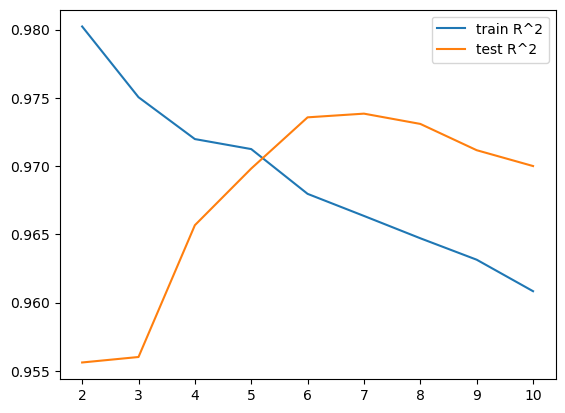

In [126]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
train_acc = []
test_acc = []
for k in range(2, 11):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train, y_train)
    te_ac = neigh.score(X_test, y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
X_label = list(range(2, 11))
plt.plot(X_label, train_acc, label='train R^2')
plt.plot(X_label, test_acc, label='test R^2')
plt.legend()
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error as mse

In [128]:
fk = 4
# gt y=6, predict: y_p = 4, mse = (6-4)^2
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test, preds))

0.03212098841837915


In [129]:
fk = 5
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test, preds))

0.02823676557733111


In [130]:
fk = 1
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test, preds))

0.05002984819883416
